In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
f = open('mem_out.txt', 'r').read().splitlines()

In [3]:
# maps pid -> details
processes = {}

for line in f:
    line = json.loads(line)
    for p in line:
        if p['name'] == 'ray::IDLE' or p['name'] == 'raylet': continue
        if not p['name'].startswith('ray'): continue
        p['total_mem'] = p['mem_info']['rss']#np.sum(list(p['mem_info'].values()))
        if p['id'] not in processes:
            processes[p['id']] = []
        processes[p['id']].append(p)

In [4]:
names = {pid: p[-1]['name'] for pid, p in processes.items()}

Text(0, 0.5, 'Mem, bytes')

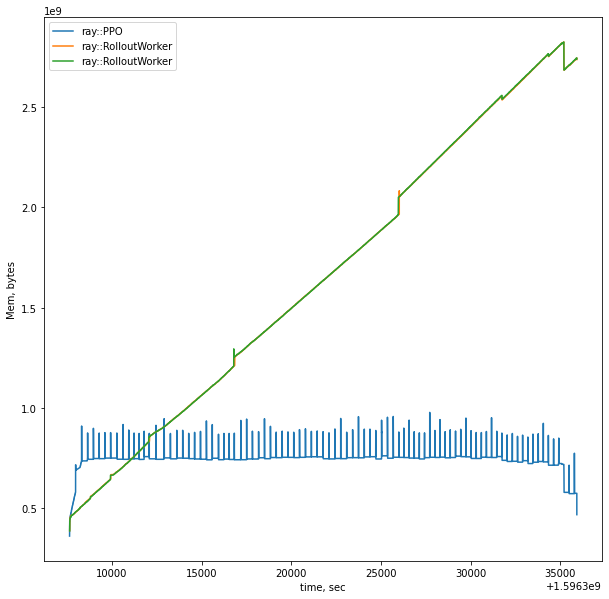

In [5]:
plt.figure(figsize=(10, 10))
for pid, p in processes.items():
    plt.plot([x['timestep'] for x in processes[pid]],
        [x['mem_info']['rss'] for x in processes[pid]], label=names[pid])
plt.legend()
plt.xlabel('time, sec')
plt.ylabel('Mem, bytes')